In [1]:
import dismech_nn
import torch
import torchdiffeq
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
test = dismech_nn.Multi_MSD([1, 1], [1, 1], [0, 0])

t = torch.linspace(0, 10, 1000)
y0 = torch.tensor([1.,0.,0.,0.])

sol = torchdiffeq.odeint_adjoint(test, y0, t).permute([1,0])

In [31]:
print(test.matrix)

tensor([[ 0.,  1.,  0.,  0.],
        [-2.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 1.,  0., -1.,  0.]])


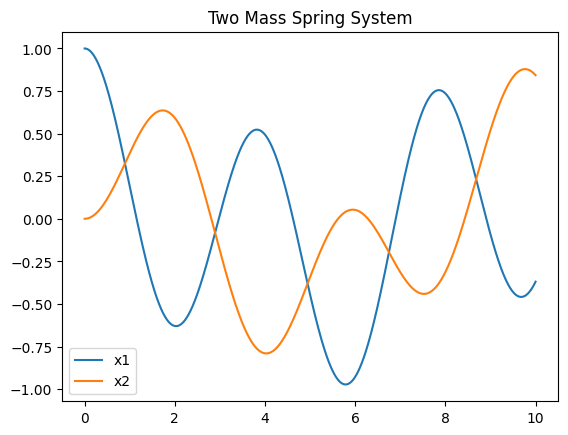

In [32]:
plt.plot(t, sol[0], label=['x1'])
plt.plot(t, sol[2], label=['x2'])
plt.legend()
plt.title("Two Mass Spring System")
plt.show()

In [33]:
y0 = torch.tensor([[1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 0.0, 0.0], [-4.0, 0.0, 0.0, 0.0]])
truth = dismech_nn.Multi_MSD([1, 1], [1, 1], [0, 0])

ode_set = dismech_nn.ODEDataset(truth,
                                y0,
                                [0, 10],
                                1000,
                                64,
                                20)

y0_valid = torch.tensor([[3.0, 0.0, 0.0, 0.0], [-1.0, 0.0, 0.0, 0.0]])
ode_valid_set = dismech_nn.ODEDataset(truth,
                                        y0_valid,
                                        [0, 20],
                                        1000,
                                        64,
                                        1000)

train_dataloader = DataLoader(ode_set, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(ode_valid_set, batch_size=64, shuffle=True)


In [35]:
my_mlp = dismech_nn.MLP(in_out=4)
my_mlp.load_state_dict(torch.load('50_epochs', weights_only=True))
dismech_nn.train_ode(my_mlp, train_dataloader,
                         valid_dataloader, 25, viz=False)

Validation Loss: 0.011106880381703377
Validation Loss: 0.010677304118871689
Validation Loss: 0.00798074807971716
Validation Loss: 0.006082967855036259
Validation Loss: 0.005366564728319645
Validation Loss: 0.007258422207087278
Validation Loss: 0.004721348639577627
Validation Loss: 0.0044215708039700985
Validation Loss: 0.005340237636119127
Validation Loss: 0.003004236612468958
Validation Loss: 0.0030991400126367807
Validation Loss: 0.003259969176724553
Validation Loss: 0.0028000567108392715
Validation Loss: 0.0021015165839344263
Validation Loss: 0.0037614002358168364
Validation Loss: 0.0026399625930935144
Validation Loss: 0.0026399230118840933
Validation Loss: 0.0022732324432581663
Validation Loss: 0.0021256792824715376
Validation Loss: 0.0021525616757571697
Validation Loss: 0.0023727426305413246
Validation Loss: 0.0019749754574149847
Validation Loss: 0.0017878004582598805
Validation Loss: 0.0018809802131727338
Validation Loss: 0.0021249756682664156


In [38]:
torch.save(my_mlp.state_dict(), '75_epochs')

In [50]:
t = torch.linspace(0, 20, 1000)
y0 = torch.tensor([3.,0.,0.,0.])
mlp_sol = torchdiffeq.odeint_adjoint(my_mlp, y0, t).detach().permute([1,0])
sol = torchdiffeq.odeint_adjoint(test, y0, t).permute([1,0])

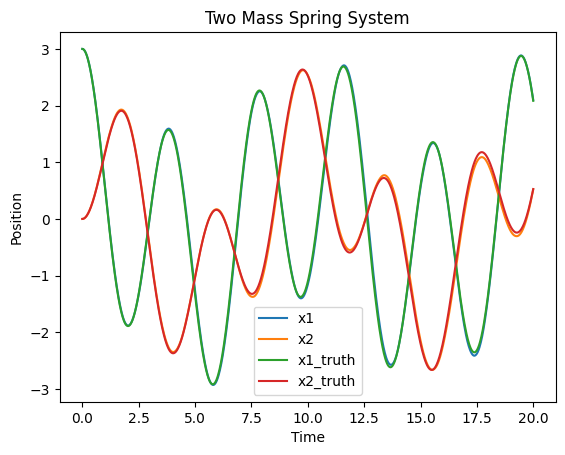

In [51]:
plt.plot(t, mlp_sol[0], label=['x1'])
plt.plot(t, mlp_sol[2], label=['x2'])
plt.plot(t, sol[0], label=['x1_truth'])
plt.plot(t, sol[2], label=['x2_truth'])
plt.legend()
plt.title("Two Mass Spring System")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

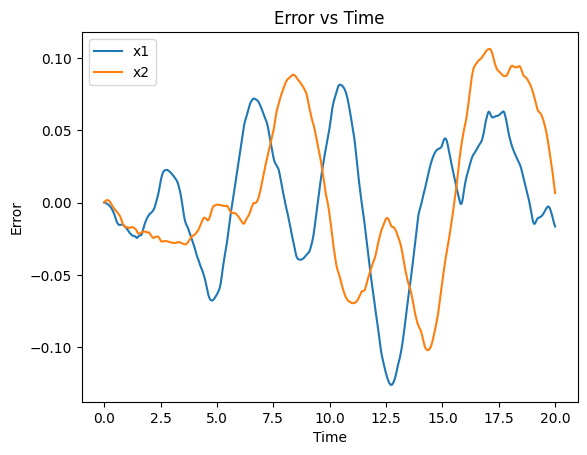

In [52]:
plt.plot(t, sol[0]-mlp_sol[0], label='x1')
plt.plot(t, sol[2]-mlp_sol[2], label='x2')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Time')
plt.title("Error vs Time")
plt.show()